# Figure Generation for NGC 2808 Paper

## Document Setup

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle as pkl
from scipy.spatial.distance import cdist
from tqdm import tqdm
import numpy as np
from pathlib import Path

from scipy.interpolate import splrep, BSpline
from scipy.signal import savgol_filter

from pysep.atm.utils import load_new_style
import matplotlib


In [133]:
PHOTROOT = "/mnt/Astronomy/GraduateSchool/Thesis/GCConsistency/NGC2808/photometry/HUGS/ngc2808/photometry.pkl"

# Fidanka Section

### Density Map

In [134]:
def normalize_density(color, mag, density, n=5000):
    normDensity = np.zeros(shape=color.shape[0])
    for IDx, (c, m, d) in tqdm(enumerate(zip(color, mag, density)), total=len(density)):
        distances = cdist(np.array([[c, m]]), np.array([color, mag]).T)[0]
        closestIDX= np.argpartition(distances, n)
        closestDensity = density[closestIDX[:n]]
        meanNearDensity = np.mean(closestDensity)
        normalizedDensity = d/meanNearDensity
        normDensity[IDx] = normalizedDensity
    return normDensity
def normalize_density_magBin(color, mag, density, binSize=0.1):
    normDensity = np.zeros(shape=color.shape[0])
    for IDx, (c, m, d) in tqdm(enumerate(zip(color, mag, density)), total=len(density)):
        cut = (mag > m-binSize/2) & (mag <= m+binSize/2)
        binDensity = density[cut]
        meanBinDensity = np.mean(binDensity)
        normalizedDensity = d/meanBinDensity
        normDensity[IDx] = normalizedDensity
    return normDensity

In [135]:
densityCache = "/mnt/Astronomy/packages/localTests/fidanka/MC_1_Density.npz"
assert os.path.exists(densityCache), "Density Cache File not Found!" 

In [136]:
density = np.load(densityCache)['density']
with open(PHOTROOT, 'rb') as f:
    HUGSPhotometry = pkl.load(f)[1]
color = HUGSPhotometry["F275W"] - HUGSPhotometry["F814W"]
mag = HUGSPhotometry["F814W"]
HUGSPhotometry['density'] = normalize_density_magBin(color, mag, density, binSize=0.3)

100%|████████████████████████████████████████████████████████| 38319/38319 [00:16<00:00, 2372.06it/s]


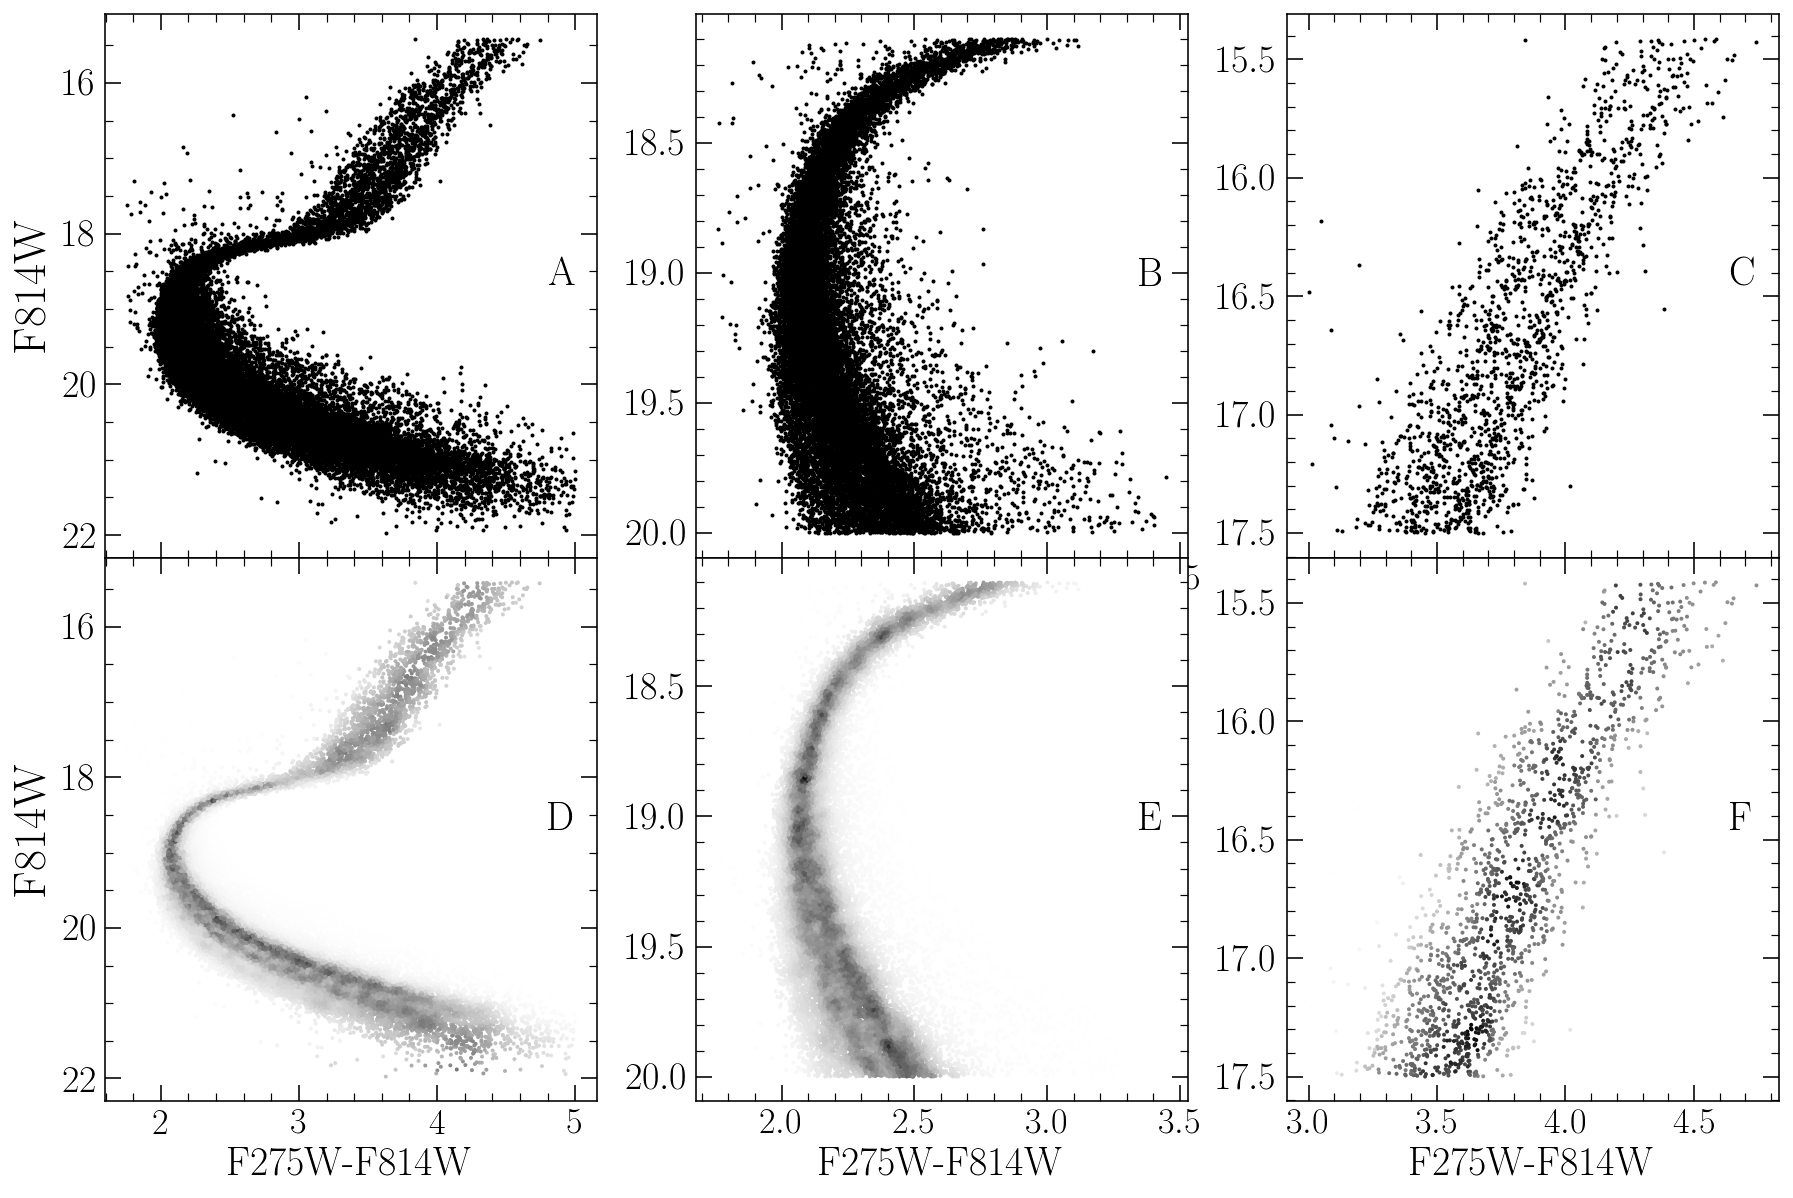

In [137]:
with plt.style.context(pubStyle):
    fig, axs = plt.subplots(2,3, figsize=(15, 10))

    ax1 = axs[0,0]
    ax2 = axs[1,0]
    ax3 = axs[0,1]
    ax4 = axs[1,1]
    ax5 = axs[0,2]
    ax6 = axs[1,2]
    
    f1 = "F275W"
    f2 = "F814W"
    f3 = f2
    color = HUGSPhotometry[f1]-HUGSPhotometry[f2]
    mag = HUGSPhotometry[f3]
    density = HUGSPhotometry["density"]
    
    condF = (color > 1.75) & (color < 5) & (mag < 22) & (mag > 15)
    colorF = color[condF]
    magF = mag[condF]
    densityF = density[condF]

    ax1.scatter(colorF, magF, s=1, c='k')
    ax1.invert_yaxis()

    ax2.scatter(colorF, magF, s=1, c=densityF, cmap='Greys')
    ax2.invert_yaxis()
    
    condZ = (color > 1.75) & (color < 3.5) & (mag < 20) & (mag > 18.1)
    colorZ = color[condZ]
    magZ = mag[condZ]
    densityZ = density[condZ]
    
    ax3.scatter(colorZ, magZ, s=1, c='k')
    ax3.invert_yaxis()
    
    # normDensityZ = normalize_density(colorZ, magZ, densityZ)
    ax4.scatter(colorZ, magZ, s=1, c=densityZ, alpha=1, cmap='Greys')
    ax4.invert_yaxis()
    
    IDs = ["A", "B", "C", "D", "E", "F"]
    Axs = [ax1, ax3, ax5, ax2, ax4, ax6]
    for ax, l in zip(Axs, IDs):
        ax.text(0.9, 0.5, l, transform=ax.transAxes)
    
    plt.subplots_adjust(hspace=0)
    
    ax1.set_ylabel(f"{f3}", fontsize=23)
    ax2.set_ylabel(f"{f3}", fontsize=23)
    # ax3.set_ylabel(f"{f3}", fontsize=23)
    # ax4.set_ylabel(f"{f3}", fontsize=23)
    
    ax2.set_xlabel(f"{f1}-{f2}")
    ax4.set_xlabel(f"{f1}-{f2}")
    ax6.set_xlabel(f"{f1}-{f2}")
    
    condRGB = (color > 3) & (color < 5) & (mag < 17.5) & (mag > 15)
    colorRGB = color[condRGB]
    magRGB = mag[condRGB]
    densityRGB = density[condRGB]
    # normDensity = normalize_density(colorRGB, magRGB, densityRGB, n=10)
    ax5.scatter(colorRGB, magRGB,s=1, c='k')
    ax5.invert_yaxis()
    ax6.scatter(colorRGB, magRGB,s=1, c=densityRGB, cmap="Greys")
    ax6.invert_yaxis()
    
    fig.savefig("Figures/DensityMapDemo.pdf")
    fig.savefig("Figures/DensityMapDemo.png", dpi=200)

### Density Bins Demo

In [138]:
densityCache = "/mnt/Astronomy/packages/localTests/fidanka/MC_1_Density.npz"
assert os.path.exists(densityCache), "Density Cache File not Found!" 

In [139]:
density = np.load(densityCache)['density']
with open(PHOTROOT, 'rb') as f:
    HUGSPhotometry = pkl.load(f)[1]
color = HUGSPhotometry["F275W"] - HUGSPhotometry["F814W"]
mag = HUGSPhotometry["F814W"]
HUGSPhotometry['density'] = normalize_density_magBin(color, mag, density, binSize=0.3)

100%|████████████████████████████████████████████████████████| 38319/38319 [00:16<00:00, 2288.40it/s]


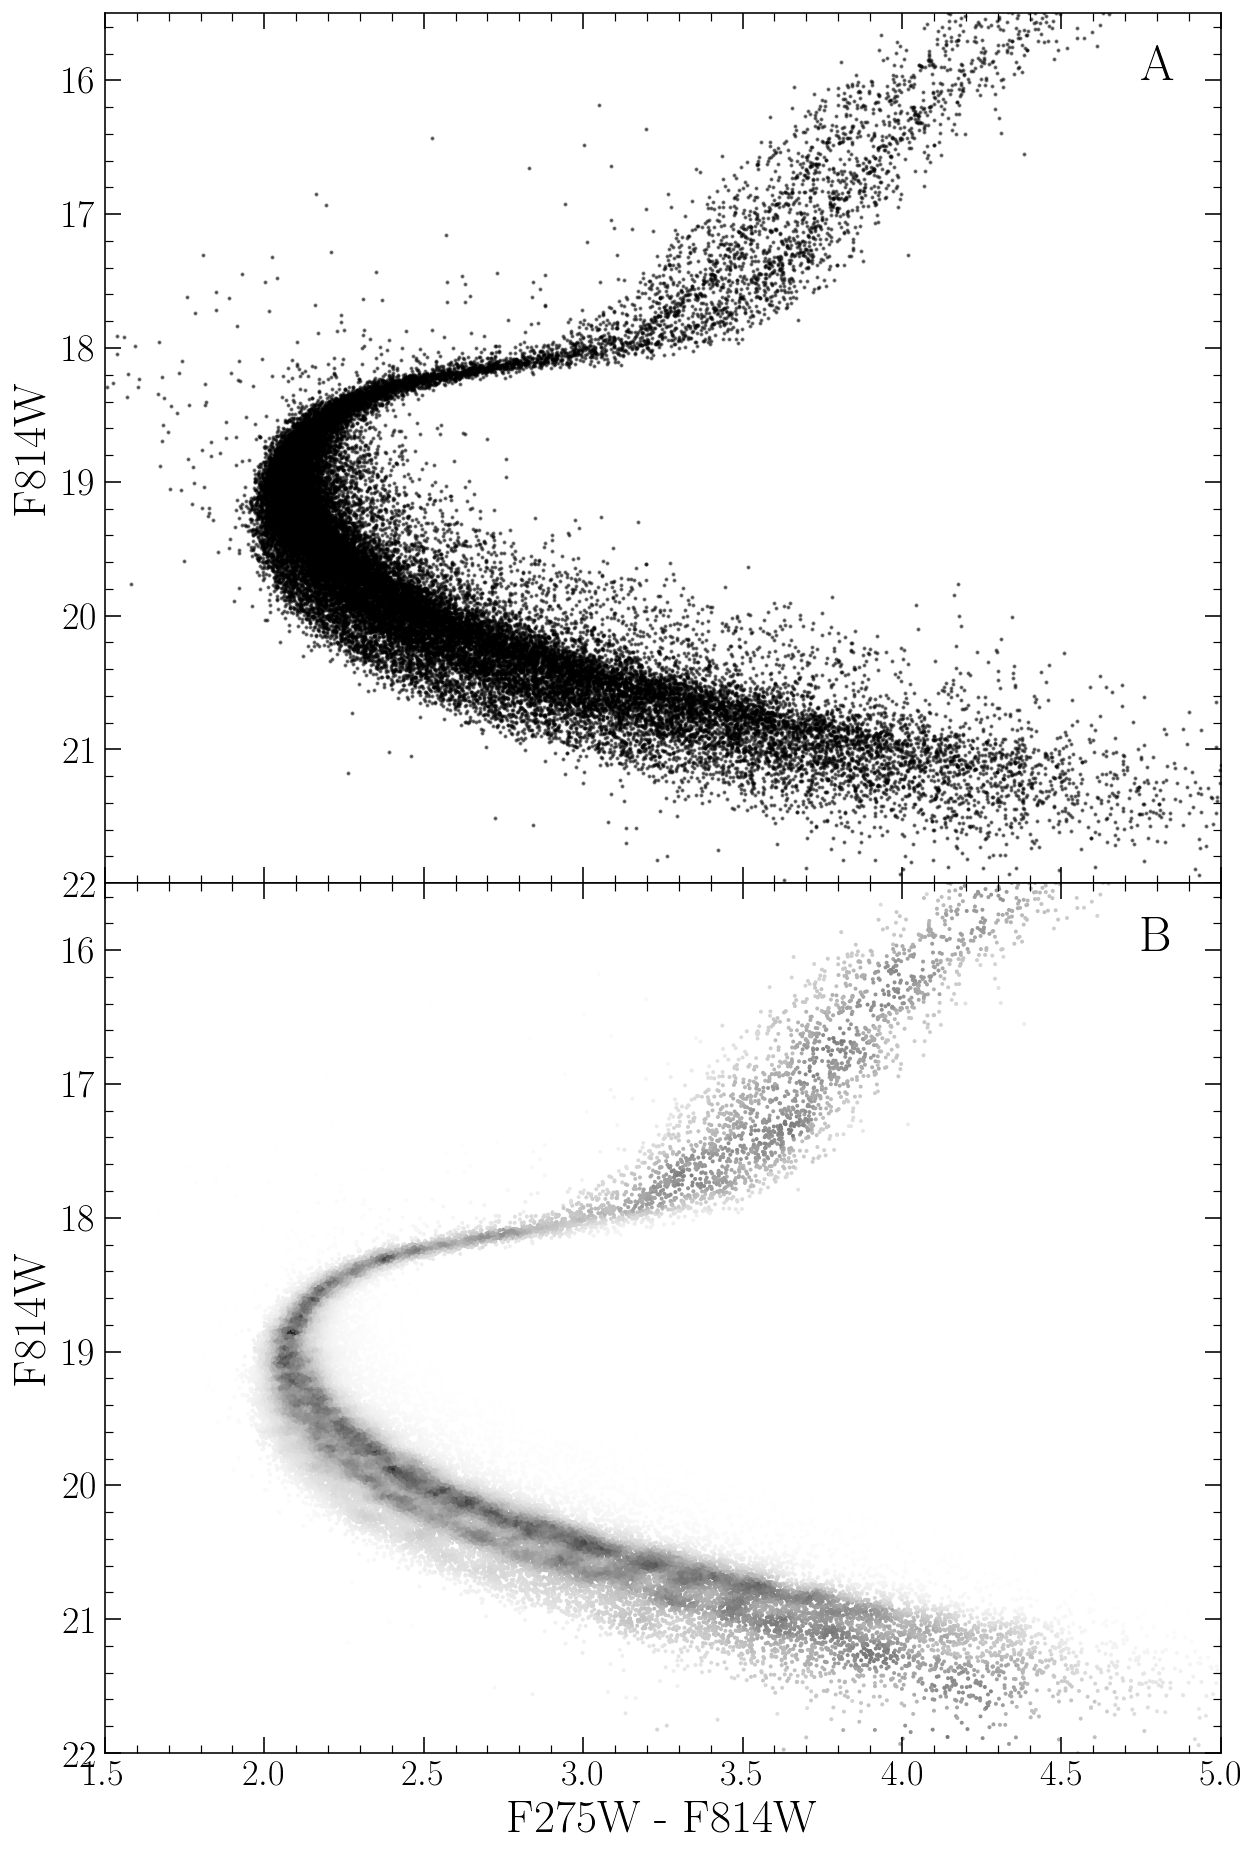

In [140]:
with plt.style.context(pubStyle):
    fig, axs = plt.subplots(2,1,figsize=(10,16))
    fig.subplots_adjust(hspace=0)
    axs[0].scatter(color, mag, s=1, alpha=0.5, color='black')

    axs[1].scatter(color, mag, s=1, c=HUGSPhotometry['density'], cmap='Greys')
    
    axs[1].set_xlim(1.5, 5)
    axs[0].set_xlim(axs[1].get_xlim())
    axs[0].xaxis.set_ticklabels([])
    
    axs[1].set_ylim(15.5, 22)
    axs[0].set_ylim(axs[1].get_ylim())
    
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    
    axs[1].set_xlabel("F275W - F814W", fontsize=23)
    axs[0].set_ylabel("F814W", fontsize=23)
    axs[1].set_ylabel("F814W", fontsize=23)
    
    axs[0].annotate("A", (4.75, 16), fontsize=25)
    axs[1].annotate("B", (4.75, 16), fontsize=25)
    
    fig.savefig("Figures/DensityMap.png", dpi=200)
    fig.savefig("Figures/DensityMap.pdf")

In [ ]:
def binDensityKeepingCountingStatisticsTheSame(color, mag, density, targetStat=1000):
    srtedIDX = np.argsort(mag)
    sMag = mag[srtedIDX]
    sColor = color[srtedIDX]
    sDensity = density[srtedIDX]
    subs = np.floor(sMag.shape[0]/targetStat).astype(int)
    binsM = np.array_split(sMag, subs)
    binsC = np.array_split(sColor, subs)
    binsD = np.array_split(sDensity, subs)
    
    return binsM, binsC, binsD

In [ ]:
with plt.style.context(pubStyle):
    bM, bC, bD = binDensityKeepingCountingStatisticsTheSame(color, mag, density, targetStat=1000)
    fig, ax = plt.subplots(1,1,figsize=(10,7))
    compress = 6
    ax.scatter(color, compress*mag, alpha=0.05, s=1, c='grey')

    xlim = (1.75, 6)
    for m, c, d in zip(bM, bC, bD):
        d = d[(c > xlim[0]) & (c < xlim[1])]
        c = c[(c > xlim[0]) & (c < xlim[1])]
        sortedCIDX = np.argsort(c)
        sC = c[sortedCIDX]
        sD = d[sortedCIDX]
        X = sC
        Y = (sD/(np.mean(sD))-1)+(compress*np.mean(m))
        filteredY = savgol_filter(Y, 25, 2)
        # tck = splrep(X, Y, s=10)
        # newX = np.linspace(X.min(), X.max(), 1000)
        # newY = BSpline(*tck)(newX)
        ax.plot(X, filteredY, 'k')
    ax.set_xlim(1.5, 6.25)
    ax.set_ylim(130,90)
    oldLabels = ax.get_yticklabels()
    oldValues = ax.get_yticks()
    newValues = oldValues/compress

    for x, y in zip(oldLabels, newValues):
        txt = f"${y:0.1f}$"
        x.set_text(txt)
    ax.set_yticklabels(oldLabels)

    
    ax.set_xlabel("F275W-F814W", fontsize=23)
    ax.set_ylabel("F814W", fontsize=23)
    
    fig.savefig("Figures/DensityBinsDemo.pdf")
    fig.savefig("Figures/DensityBinsDemo.png", dpi=200)

### Pre and Post MC Sampling

In [ ]:
DensityMapPaths = [
   "/mnt/Astronomy/packages/localTests/fidanka/MC_1_Density.npz", 
   "/mnt/Astronomy/packages/localTests/fidanka/MC_2_Density.npz", 
   "/mnt/Astronomy/packages/localTests/fidanka/MC_5_Density.npz", 
   "/mnt/Astronomy/packages/localTests/fidanka/MC_10_Density.npz",
]
DensityMaps = [np.load(x)['density'] for x in DensityMapPaths]

In [ ]:
with open(PHOTROOT, 'rb') as f:
    HUGSPhotometry = pkl.load(f)[1]
    
color = HUGSPhotometry["F275W"] - HUGSPhotometry["F814W"]
mag = HUGSPhotometry["F814W"]

HUGSPhotometry['density_1'] = normalize_density(color, mag, DensityMaps[0])
HUGSPhotometry['density_2'] = normalize_density(color, mag, DensityMaps[1])
HUGSPhotometry['density_5'] = normalize_density(color, mag, DensityMaps[2])
HUGSPhotometry['density_10'] = normalize_density(color, mag, DensityMaps[3])

In [ ]:
with plt.style.context(pubStyle):
    fig, axs = plt.subplots(1,4,figsize=(20,5))
    plt.subplots_adjust(wspace=0)

    axs[1].set_yticklabels([])
    axs[2].set_yticklabels([])
    axs[3].set_yticklabels([])
    
    f1, f2, f3 = "F275W", "F814W", "F814W"
    color = HUGSPhotometry[f1]-HUGSPhotometry[f2]
    mag = HUGSPhotometry[f3]
    
    cond = (color > 1.75) & (color < 5) & (mag < 22) & (mag > 18)
    color = color[cond]
    mag = mag[cond] 
    density1 = HUGSPhotometry['density_1'][cond]
    density2 = HUGSPhotometry['density_2'][cond]
    density5 = HUGSPhotometry['density_5'][cond]
    density10 = HUGSPhotometry['density_10'][cond]
    axs[0].scatter(color, mag, s=1, c=density1, cmap='Greys')
    axs[1].scatter(color, mag, s=1, c=density2, cmap='Greys')
    axs[2].scatter(color, mag, s=1, c=density5, cmap='Greys')
    axs[3].scatter(color, mag, s=1, c=density10, cmap='Greys')
    for ax in axs:
        ax.invert_yaxis()
        
    axs[0].annotate(r"$N_{mc} = 1$", (4,19))
    axs[1].annotate(r"$N_{mc} = 2$", (4,19))
    axs[2].annotate(r"$N_{mc} = 5$", (4,19))
    axs[3].annotate(r"$N_{mc} = 10$", (4,19))


    axs[0].set_ylabel(f3, fontsize=23)
    fig.text(0.5, 0.02, f'{f1}-{f2}', ha='center', fontsize=23)
    
    fig.savefig("Figures/MCRunNumEvolution.pdf")
    fig.savefig("Figures/MCRunNumEvolution.png")
    

In [ ]:
xticks[:-1]

In [ ]:
HUGSPhotometry[condRGB]

In [ ]:
cond

In [ ]:
HUGSPhotometry

# MARCS Section

## Comparison of Atmosphers

In [ ]:
ATMROOT = '/mnt/Astronomy/GraduateSchool/Thesis/GCConsistency/NGC2808/inputs/atm/'

In [ ]:
atms = dict()
for bcFile in Path(ATMROOT).rglob("*.sbc"):
    name = str(bcFile).split('/')[-2]
    atm = load_new_style(str(bcFile))
    atms[name]= atm

In [ ]:
GAS07[1]

In [ ]:
GAS07 = atms["PopE_Y+0.36"]
POPA = atms["PopA_Y+0.24"]
with plt.style.context(pubStyle):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.plot(GAS07[0][:,0], GAS07[0][:,3], color='black', label="Population E")
    ax.plot(POPA[0][:,0], POPA[0][:,3], color='red', label="Population A")
    ax.invert_xaxis()
    ax.set_xlim(6000,2500)
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(GAS07[0][:,0], GAS07[0][:,4], linestyle='dashed', color='black')
    ax2.plot(POPA[0][:,0], POPA[0][:,4], linestyle='dashed', color='red')
    ax.set_ylabel("Pressure", fontsize=23)
    ax2.set_ylabel("Temperature [K]", fontsize=23, rotation=270, labelpad=20)
    ax.set_xlabel(r"T$_{eff}$ [K]", fontsize=23)
    ax.legend(fontsize=23, frameon=False, loc='upper right')
    
    fig.savefig("Figures/AtmosphereComparison.pdf")
    fig.savefig("Figures/AtmosphereComparison.png", dpi=200)

# Grid

In [ ]:
import os
Y = [0.24, 0.27, 0.30, 0.33, 0.36, 0.39]
a = 

In [ ]:
araw = os.listdir("/mnt/Astronomy/GraduateSchool/Thesis/GCConsistency/NGC2808/outputs.denseAlpha/PopA+0.24")
a = [float(x.split('-')[1]) for x in araw]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
for y in Y:
    yp = [y]*len(a)
    ax.plot(yp, a, 'o')

In [ ]:
import pathlib

In [114]:
root = "/mnt/Astronomy/GraduateSchool/Thesis/GCConsistency/NGC2808"

In [129]:
Y = list()
A = list()
with open(os.path.join(root, "allIsosDenseAlpha.txt"), 'r') as f:
    paths = f.readlines()
paths = [x.lstrip().rstrip() for x in paths]
# for file in pathlib.Path(root).rglob('*.iso'):
for path in paths:
    y = float(path.split('/')[-4].split('+')[1])
    a = float(path.split('/')[-3].split('-')[1])
    if os.stat(os.path.join(root, path)).st_size > 100:
        Y.append(y)
        A.append(a)

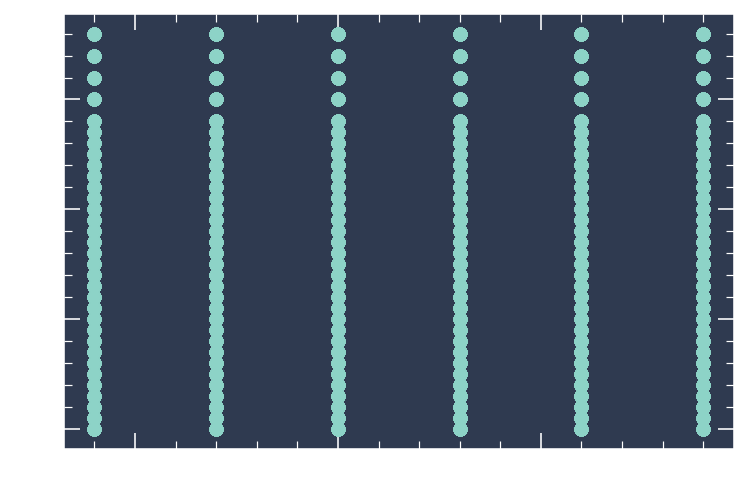

In [130]:
plt.plot(Y, A, 'o')

In [131]:
len(Y)

16593